In [95]:
import numpy as np

# 5a

This is done simply by doing the cumulative product of the constant retention rate

In [96]:

constant_retention_rate = 0.56530017

# retention_rates = [retention_rate]*12
active_probs_constant_retention = [constant_retention_rate**i for i in range(12)]

# survival_probability_const_retention_rate = np.cumprod(retention_rates)
print(active_probs_constant_retention)


[1.0, 0.56530017, 0.31956428220202887, 0.1806497430547349, 0.10212133045929796, 0.05772920546926731, 0.03263432966574174, 0.01844819210787985, 0.010428766134777136, 0.0058953832688797584, 0.0033326611641128832, 0.0018839539226254106]


# 5b

Using almost the same as in the previous task. Getting the same averages for each month after acquisition, and then doing the cumulative product across the retention rates to get the active probabilities

In [97]:
from main import get_all_retention_rates_time_normalized, get_data

data = get_data()

get_all_retention_rates_months_after_acquisition = get_all_retention_rates_time_normalized(data)

avg_monthly_retention_rate_across_cohorts = np.apply_along_axis(np.nanmean,axis = 0, arr = get_all_retention_rates_months_after_acquisition)

active_probs_changing_retention = avg_monthly_retention_rate_across_cohorts[1:-1]
active_probs_changing_retention = np.insert(active_probs_changing_retention,0,1)
active_probs_changing_retention = np.cumprod(active_probs_changing_retention)

# print(avg_monthly_retention_rate_across_cohorts)
# retention_probabilities = np.cumprod(avg_monthly_retention_rate_across_cohorts[1:-1])
print(active_probs_changing_retention)

[1.00000000e+00 4.83087149e-01 5.75345930e-02 1.41523483e-02
 6.02462849e-03 2.68580000e-03 1.61148000e-03 5.37160000e-04
 5.37160000e-04 5.37160000e-04 5.37160000e-04]


/opt/homebrew/lib/python3.10/site-packages/numpy/lib/shape_base.py:379: RuntimeWarning: Mean of empty slice
  res = asanyarray(func1d(inarr_view[ind0], *args, **kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/shape_base.py:402: RuntimeWarning: Mean of empty slice
  buff[ind] = asanyarray(func1d(inarr_view[ind], *args, **kwargs))


# 5c

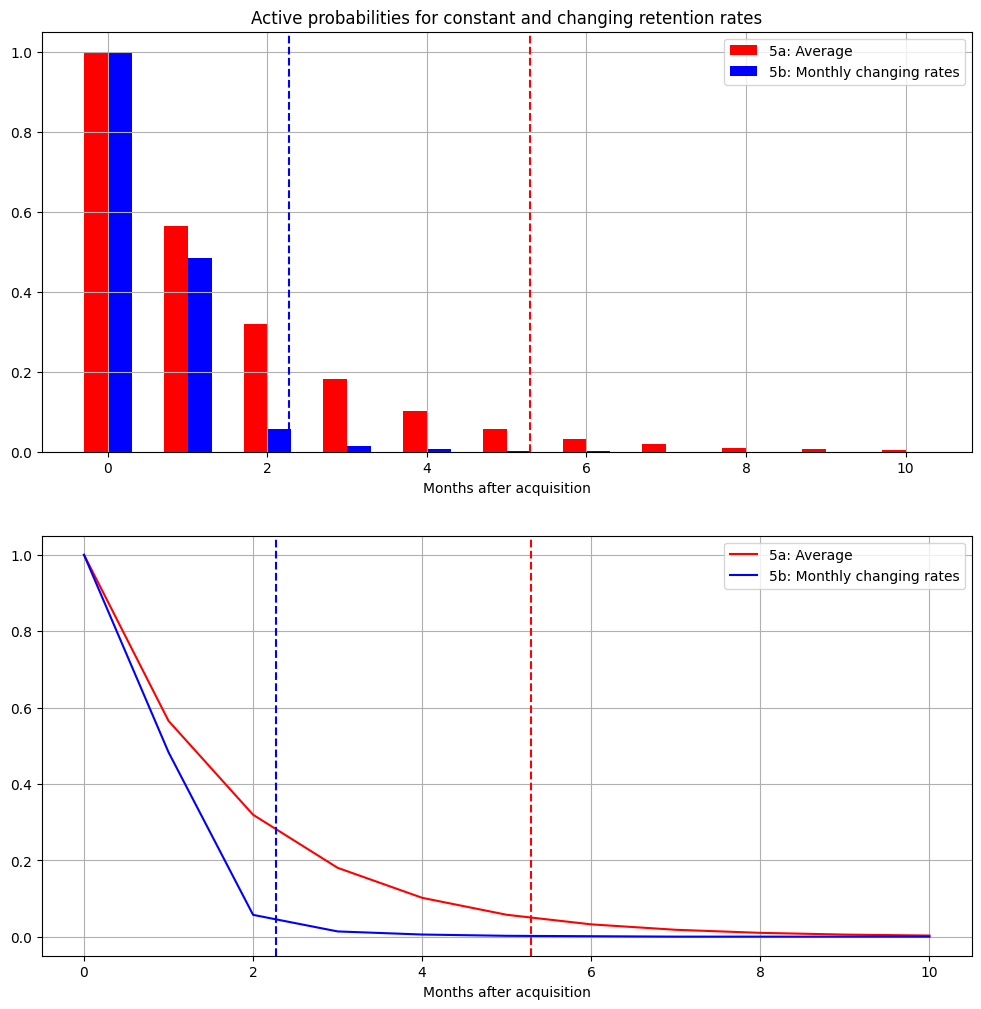

In [98]:
import matplotlib.pyplot as plt

# RUN ALL CELLS ABOVE BEFORE RUNNING THIS CELL
constant_rates_expected_lifetime = 5.29201491219346
changing_rates_expected_lifetime = 2.273317852896713



t = np.linspace(0,10,11)
bar_width = 0.3

fig, axs = plt.subplots(2, 1, figsize=(12,12))

axs[0].bar(t-bar_width/2, active_probs_constant_retention[:11], bar_width, color='r', label="5a: Average")
axs[0].bar(t+bar_width/2, active_probs_changing_retention[:11], bar_width, color='b', label="5b: Monthly changing rates")
axs[0].axvline(x=constant_rates_expected_lifetime, color='r', linestyle='--')
axs[0].axvline(x=changing_rates_expected_lifetime, color='b', linestyle='--')
axs[0].legend()
axs[0].grid()

axs[0].set_title("Active probabilities for constant and changing retention rates")
axs[0].set_xlabel("Months after acquisition")

axs[1].plot(t, active_probs_constant_retention[:11], color='r', label="5a: Average")
axs[1].plot(t, active_probs_changing_retention[:11], color='b', label="5b: Monthly changing rates")
axs[1].axvline(x=constant_rates_expected_lifetime, color='r', linestyle='--')
axs[1].axvline(x=changing_rates_expected_lifetime, color='b', linestyle='--')
axs[1].legend()
axs[1].grid()

axs[1].set_xlabel("Months after acquisition")

plt.show()


We've set the first survival probability to $1$ since all customers stay at least for the first month. The bars and lines show the active probabilities for each month for the constant retention rate and for the changing retention rates. The x-axes show the expected month lifetime for each type of calculation.
The two methods are rather similar for $x=1$ and for $x>8$. other than those, the more realistic survival probability from changing monthly rates is way lower from $x=2$ to $x=7$

# 5d

Based on the graphs and discussion in 5c, using the constant retention rate will most likely overestimate CLV at least for newly acquired users, while using the changing retention will underestimate CLV as we didn't account for the customers who've already subscribed for longer or for the acquired customers from our dataset that will stay for longer than a year. But for calculating CLV's for customers that we consider acquiring now in month 12, the changing retention rate should be more accurate

At this point, we see this two methods as pretty different and could do divide the customer type into two different types that correspond with the calculations. The newly acquired vs. the long lasting ones. The newly acquired more accurately follow the monthly changing retention rates, while the long lasting are more accurate to correspond with the constant retention rate with the expected value of 5.29, and this could even be underestimating the long-lasting customers since we are using data on only a 1-year time window